In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier # Model 1 or Base Model
from sklearn.ensemble import RandomForestClassifier # Model 2
from sklearn.tree import DecisionTreeClassifier # Model 3
from sklearn.model_selection import RandomizedSearchCV # Model 4
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle

# Data importing and Basic Data Analysis

In [2]:
df = pd.read_csv(".\Credit_card.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
# We can not see any null values but we will still look for null values just in case
print('Number of Null values')
print(df.isnull().sum())
print()
print('Number of ? values')
print((df == '?').sum())
print('Number of 0 values')
print((df == 0).sum())

Number of Null values
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Number of ? values
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE         

We can see there are 0 values in Education, Marriage, and PAY_0 to PAY_6 where 0 value has no place

In [4]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month']
numerical_cols = df.drop(['ID','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis=1)

In [5]:
print('Describing numerical columns')
print(df[numerical_cols.columns].describe())

Describing numerical columns
            LIMIT_BAL      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count    30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    167484.322667   51223.330900   49179.075167  4.701315e+04   
std     129747.661567   73635.860576   71173.768783  6.934939e+04   
min      10000.000000 -165580.000000  -69777.000000 -1.572640e+05   
25%      50000.000000    3558.750000    2984.750000  2.666250e+03   
50%     140000.000000   22381.500000   21200.000000  2.008850e+04   
75%     240000.000000   67091.000000   64006.250000  6.016475e+04   
max    1000000.000000  964511.000000  983931.000000  1.664089e+06   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count   30000.000000   30000.000000   30000.000000   30000.000000   
mean    43262.948967   40311.400967   38871.760400    5663.580500   
std     64332.856134   60797.155770   59554.107537   16563.280354   
min   -170000.000000  -81334.000000 -339603.000000       0.000000   
25% 

# Data cleaning

In [6]:
# From df.info we can see that there is no PAY_1 between PAY_0 and PAY_2
# We can rename PAY_0 to PAY_1 becasue BILL_AMT and PAY_AMT are also starting from 1

df = df.rename(columns={'PAY_0':'PAY_1'})

print(f'Column names are :', list(df.columns))

Column names are : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [7]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown"
# Changing 6 to 5 to keep it under 1 category

df['EDUCATION'] = df['EDUCATION'].replace(6,5)
df['EDUCATION'] = df['EDUCATION'].replace(0,5)

print(f'Unique values of Education columns are:',np.unique(df['EDUCATION']))

Unique values of Education columns are: [1 2 3 4 5]


In [8]:
# Changing 0 values in marriage to 3
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

print(f'Unique values of Marriage columns are:',np.unique(df.MARRIAGE))


Unique values of Marriage columns are: [1 2 3]


In [9]:
# Changing 0 values in PAY_1 to PAY_6 to median of their respective column
df['PAY_1'] = df['PAY_1'].replace(0, -1)
df['PAY_1'] = df['PAY_1'].replace(-2, -1)
print(np.unique(df['PAY_1']))
df['PAY_2'] = df['PAY_2'].replace(0, -1)
df['PAY_2'] = df['PAY_2'].replace(-2, -1)
print(np.unique(df['PAY_2']))
df['PAY_3'] = df['PAY_3'].replace(0, -1)
df['PAY_3'] = df['PAY_3'].replace(-2, -1)
print(np.unique(df['PAY_3']))
df['PAY_4'] = df['PAY_4'].replace(0, -1)
df['PAY_4'] = df['PAY_4'].replace(-2, -1)
print(np.unique(df['PAY_4']))
df['PAY_5'] = df['PAY_5'].replace(0, -1)
df['PAY_5'] = df['PAY_5'].replace(-2, -1)
print(np.unique(df['PAY_5']))
df['PAY_6'] = df['PAY_6'].replace(0, -1)
df['PAY_6'] = df['PAY_6'].replace(-2, -1)
print(np.unique(df['PAY_6']))

[-1  1  2  3  4  5  6  7  8]
[-1  1  2  3  4  5  6  7  8]
[-1  1  2  3  4  5  6  7  8]
[-1  1  2  3  4  5  6  7  8]
[-1  2  3  4  5  6  7  8]
[-1  2  3  4  5  6  7  8]


In [10]:
print('Number of 0 values')
print((df == 0).sum())

Number of 0 values
ID                                0
LIMIT_BAL                         0
SEX                               0
EDUCATION                         0
MARRIAGE                          0
AGE                               0
PAY_1                             0
PAY_2                             0
PAY_3                             0
PAY_4                             0
PAY_5                             0
PAY_6                             0
BILL_AMT1                      2008
BILL_AMT2                      2506
BILL_AMT3                      2870
BILL_AMT4                      3195
BILL_AMT5                      3506
BILL_AMT6                      4020
PAY_AMT1                       5249
PAY_AMT2                       5396
PAY_AMT3                       5968
PAY_AMT4                       6408
PAY_AMT5                       6703
PAY_AMT6                       7173
default.payment.next.month    23364
dtype: int64


In [11]:
# We can drop the 'ID' column as it is irrelevant to our target column
df.drop(['ID'], axis=1, inplace=True)
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


# Visualization

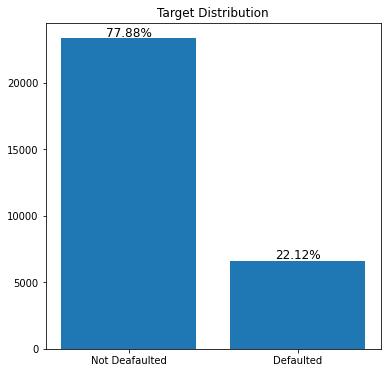

In [12]:
# Percentage of people who have Deafulted and not Defaulted

target_count = df.groupby('default.payment.next.month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default.payment.next.month'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(df['default.payment.next.month'])
not_def = len(df[df['default.payment.next.month']==0])/total *100
yes_def = len(df[df['default.payment.next.month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(df[df['default.payment.next.month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(df[df['default.payment.next.month']==1])*1.02), horizontalalignment='center')

plt.show()

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


[1 2 3 4]


<Figure size 432x432 with 0 Axes>

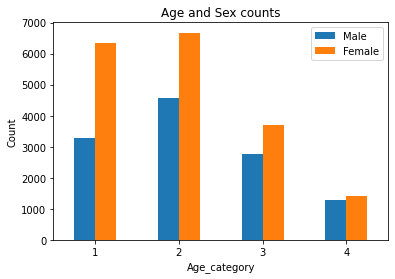

In [13]:
df['Age_category'] = [0 for i in range(len(df))]

for idx, i in enumerate(df.AGE):
    if i >= 20 and i < 30:
        df['Age_category'].loc[idx] = 1
    elif i >= 30 and i < 40:
        df['Age_category'].loc[idx] = 2
    elif i >= 40 and i < 50:
        df['Age_category'].loc[idx] = 3
    else:
        df['Age_category'].loc[idx] = 4
    
    
print(np.unique(df.Age_category))
# df['Age_category'] = pd.cut(df.AGE, bins=[20,35,50,80])

target_count = df.groupby(['Age_category','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

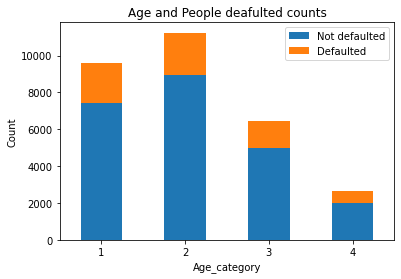

In [14]:
target_count = df.groupby(['Age_category','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

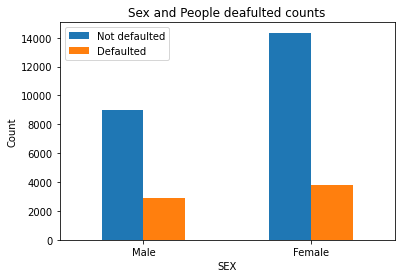

In [15]:
target_count = df.groupby(['SEX','default.payment.next.month']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and People deafulted counts")
plt.show()

C:\Users\akash\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


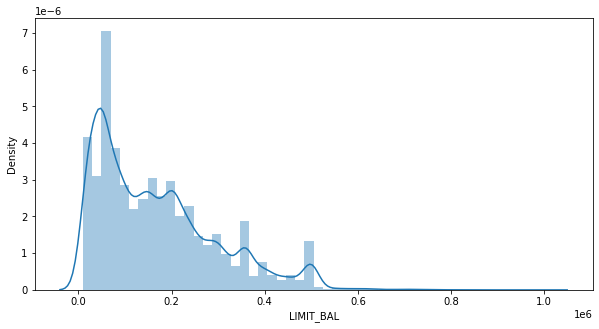

In [16]:
plt.subplots(figsize=(10,5))
# plt.subplot(121)
sns.distplot(df.LIMIT_BAL)
plt.show()

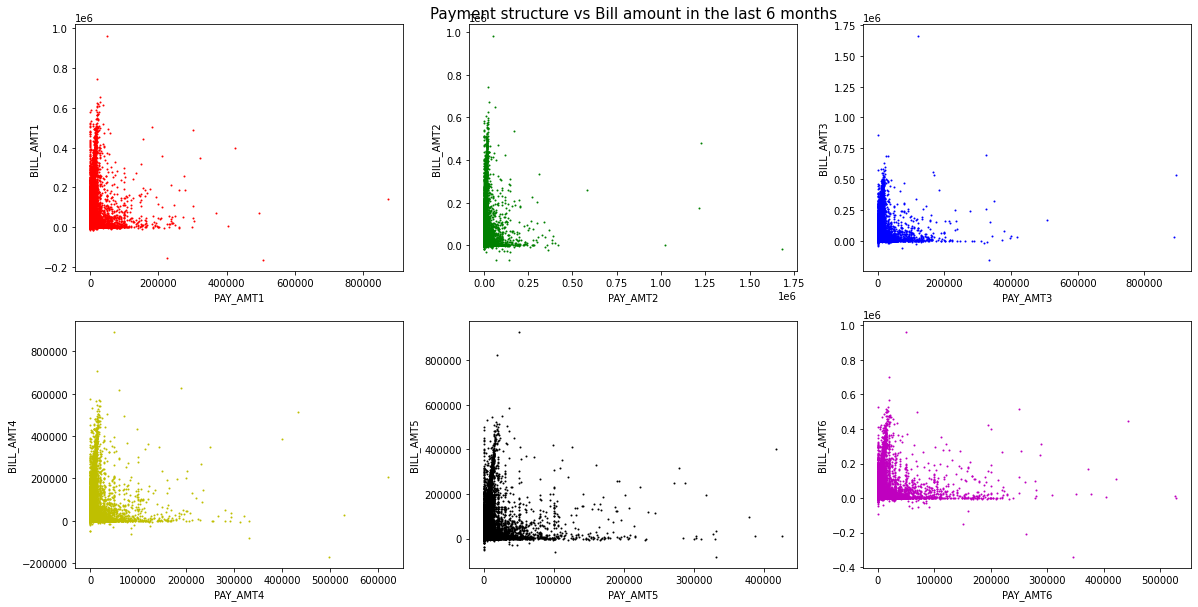

In [17]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

# Splitting the data into Train and Test

In [18]:
X = df.drop(['default.payment.next.month','Age_category'], axis=1)
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24000, 23) (24000,)
(6000, 23) (6000,)


# Building Model  

Model1 Accuracy score is : 81.53333333333333
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4683
           1       0.68      0.30      0.41      1317

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.65      6000
weighted avg       0.80      0.82      0.79      6000



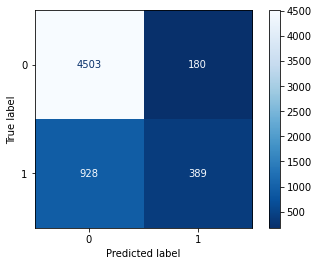

In [20]:
model1 = RidgeClassifier()

model1.fit(X_train, y_train)

model1_acc = model1.score(X_test, y_test)*100

print('Model1 Accuracy score is :', model1_acc)

print( classification_report(y_test, model1.predict(X_test)) )

plot_confusion_matrix(model1, X_test, y_test, cmap="Blues_r")

plt.show()

Model2 Accuracy score is : 81.06666666666666
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4683
           1       0.61      0.38      0.47      1317

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



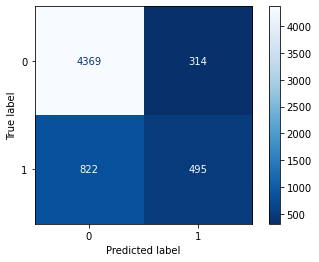

In [21]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=10)

model2.fit(X_train, y_train)

model2_acc = model2.score(X_test, y_test)*100

print('Model2 Accuracy score is :', model2_acc)

print( classification_report(y_test, model2.predict(X_test)) )

plot_confusion_matrix(model2, X_test, y_test, cmap="Blues_r")

plt.show()

Model3 Accuracy score is : 82.55
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4683
           1       0.70      0.36      0.48      1317

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.80      6000



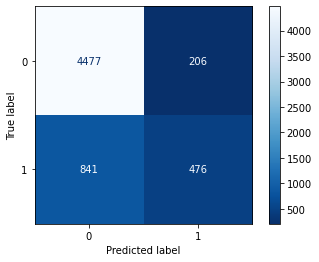

In [22]:
model3 = RandomForestClassifier(max_depth=10, n_estimators=500)

model3.fit(X_train, y_train)

model3_acc = model3.score(X_test, y_test)*100

print('Model3 Accuracy score is :', model3_acc)

print( classification_report(y_test, model3.predict(X_test)) )

plot_confusion_matrix(model3, X_test, y_test, cmap="Blues_r")

plt.show()

# Visualizing Model Accuracy

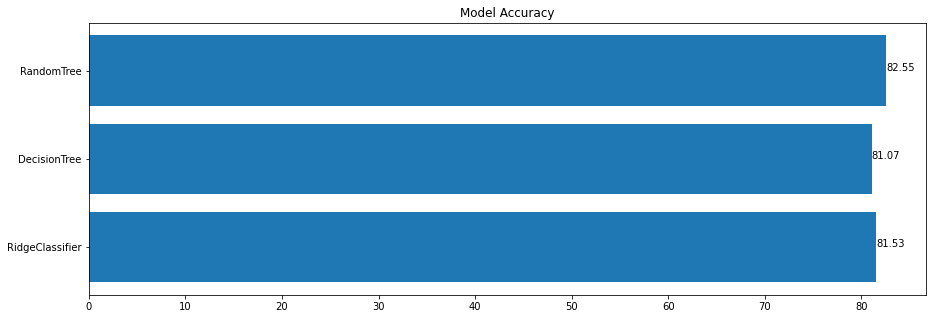

In [23]:
models = ['RidgeClassifier', 'DecisionTree', 'RandomTree']

acc = [model1_acc, model2_acc, model3_acc]

plt.figure(figsize=(15,5))
plt.barh(models, acc)
  
for index, value in enumerate(acc):
    plt.text(value, index,
             str("%.2f"%value))
plt.title("Model Accuracy")
plt.show()

# Conclusion

### RandomForrestClassfier gives us the best result

In [24]:
pickle.dump(model3, open('model.pkl','wb'))

In [25]:
np.unique(X_test.MARRIAGE)

array([1, 2, 3], dtype=int64)

In [26]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [29]:
len(np.unique(X_test.BILL_AMT1))

5195